<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto" data-toc-modified-id="Descripción-del-proyecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del proyecto</a></span><ul class="toc-item"><li><span><a href="#Descripción-de-los-datos:" data-toc-modified-id="Descripción-de-los-datos:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descripción de los datos:</a></span></li></ul></li><li><span><a href="#Importación-de-librerías-y-archivos" data-toc-modified-id="Importación-de-librerías-y-archivos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importación de librerías y archivos</a></span></li><li><span><a href="#Exploración-y-tratamiento-de-datos" data-toc-modified-id="Exploración-y-tratamiento-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploración y tratamiento de datos</a></span></li><li><span><a href="#Análisis-de-datos" data-toc-modified-id="Análisis-de-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Análisis de datos</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

# Proyecto 

## Descripción del proyecto

Durante la investigación analizaré el comportamiento de los clientes de una empresa. Como la gente usa el producto, cuándo empiezan a comprar, cuánto dinero trae cada cliente, cuándo pagan.

El objetivo del proyecto es ayudar a optimizar los gastos de marketing. Trabajaré con información proveniente de tres tablas: una con datos sobre visitas, otra con datos sobre los pedidos y otra con los gastos de marketing.


### Descripción de los datos:

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):
- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.


La tabla orders (datos sobre pedidos):
- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.


La tabla costs (datos sobre gastos de marketing):
- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.

## Importación de librerías y archivos

In [ ]:
# Importación de librerías a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Descarga de datasets

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

## Exploración y tratamiento de datos

In [ ]:
# Chequeo dataset Visits

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
# Cambio nombre de columnas a minúscula

visits= visits.rename(columns=str.lower)
visits.head()

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
# Conversión tipo de datos y optimización dataset Visits

#Columna Device
#visits['Device'].value_counts()
visits['device']= visits['device'].astype('category')

#Columnas End Ts y Start Ts
visits['end ts']= pd.to_datetime(visits['end ts'], format= '%Y-%m-%d %H:%M:%S')
visits['start ts']= pd.to_datetime(visits['start ts'], format= '%Y-%m-%d %H:%M:%S')

#Chequeo datos
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [ ]:
#Chequeo valores ausentes
visits.isna().sum()

device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

In [ ]:
visits.duplicated().sum()

0

In [ ]:
# Chequeo dataset Orders

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
# Cambio nombre de columnas a minúscula

orders= orders.rename(columns=str.lower)
orders.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
# Conversión tipo de datos y optimización dataset Orders

#Columna Buy ts
orders['buy ts']= pd.to_datetime(orders['buy ts'], format= '%Y-%m-%d %H:%M:%S')

#Chequeo datos
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
#Chequeo valores ausentes
orders.isna().sum()

buy ts     0
revenue    0
uid        0
dtype: int64

In [ ]:
# Chequeo valores duplicados
orders.duplicated().sum()

0

In [ ]:
# Chequeo dataset Costs

costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
# Conversión tipo de datos y optimización dataset Costs

#Columna dt
costs['dt']= pd.to_datetime(costs['dt'], format= '%Y-%m-%d')

#Chequeo datos
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [ ]:
# Chequeo valores ausentes
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [ ]:
# Chequeo valores duplicados
costs.duplicated().sum()

0

## Análisis de datos

Primero voy a averiguar cuantas personas usan el producto por día, por semana y por mes.

In [ ]:
# Agrego columnas para que sea más facil el análisis

visits['session_year']= visits['start ts'].dt.year
visits['session_month']= visits['start ts'].dt.month
visits['session_week']= visits['start ts'].dt.week
visits['session_date']= visits['start ts'].dt.date

/tmp/ipykernel_496/3752871794.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']= visits['start ts'].dt.week


In [ ]:
# Cálculo N de usuarios diarios promedio
dau= visits.groupby('session_date').agg({'uid':'nunique'}).mean()

# Cálculo N de usuarios por semana promedio
wau= visits.groupby(['session_year','session_week']).agg({'uid':'nunique'}).mean()

# Cálculo N de usuarios por mes promedio
mau= visits.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()

print('DAU:',int(dau))
print('WAU:',int(wau))
print('MAU:',int(mau))

DAU: 907
WAU: 5716
MAU: 23228


Busco la frecuencia con la que regresan los usuarios.

In [ ]:
# % Frecuencia semanal 
sticky_wau= dau /wau * 100

# % Frecuencia mensual
sticky_mau= dau /mau * 100

print('% Sticky wau:',sticky_wau)

print('% Sticky mau:',sticky_mau)

% Sticky wau: uid    15.884409
dtype: float64
% Sticky mau: uid    3.90897
dtype: float64


Busco la cantidad de sesiones por día y su duración.

In [ ]:
# Cantidad de sesiones por día
sessions_per_day= visits.groupby(['session_year','session_date']).agg({'uid': ['count','nunique']})
sessions_per_day.columns= ['n_sessions','n_users']
sessions_per_day

n_sessions  n_users
session_year session_date                     
2017         2017-06-01           664      605
             2017-06-02           658      608
             2017-06-03           477      445
             2017-06-04           510      476
             2017-06-05           893      820
...                               ...      ...
2018         2018-05-27           672      620
             2018-05-28          1156     1039
             2018-05-29          1035      948
             2018-05-30          1410     1289
             2018-05-31          2256     1997

[364 rows x 2 columns]

Podemos observar que hay usuarios que tienen más de una sesión por día.

<AxesSubplot:>

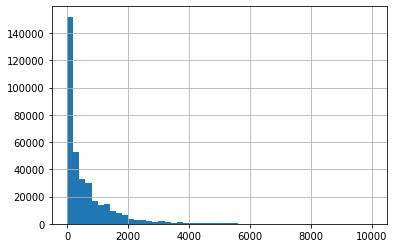

In [ ]:
# Duración de cada sesión y distribución

visits['session_duration']= (visits['end ts'] - visits['start ts']).dt.seconds

visits['session_duration'].hist(range=(0,10000),bins=50)

In [ ]:
# Duración promedio de la sesión

asl= visits['session_duration'].mode()
asl

0    60
dtype: int64

Como no tenemos una distribución pareja, utilizo la moda en lugar de la mediana para saber cual es la frecuencia de más utilizada siendo en nuestro caso 60 segundos.

<AxesSubplot:>

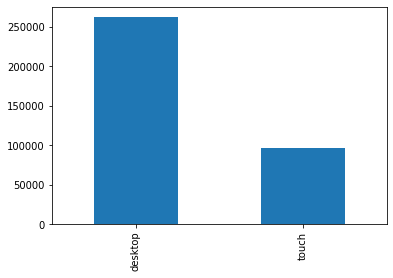

In [ ]:
# Proporción de uso de dispositivos 
visits['device'].value_counts().plot(kind='bar')

In [ ]:
# Uso de dispositivos por fuente
dispositivos= visits.groupby('source id').agg({'device':'value_counts'})
dispositivos.columns= ['cantidad']
dispositivos

cantidad
source id device           
1         desktop     25901
          touch        8220
2         desktop     35661
          touch       11965
3         desktop     65777
          touch       19833
4         desktop     67640
          touch       34154
5         desktop     50069
          touch       16836
6         desktop         5
          touch           1
7         desktop        28
          touch           8
9         desktop     10119
          touch        3158
10        desktop      7367
          touch        2658

Podemos observar que el dispositivo más utilizado en cada una de las fuentes es desktop.

A continuación voy a investigar en que momento los usuarios comienzan a comprar en relación a la primer visita. 

In [ ]:
# Busco cuando fue la primer visita de cada usuario

primer_visita= visits.groupby('uid').agg({'start ts':'min'}).reset_index()
primer_visita.columns= ['uid','first_visit_month']

primer_visita

,uid,first_visit_month
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [ ]:
# Busco la primera orden de cada usuario

primer_orden= orders.groupby('uid').agg({'buy ts':'min'}).reset_index()
primer_orden.columns= ['uid','primer_order']
primer_orden

,uid,primer_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [ ]:
# Uno tabla de primer visita con tabla de primera orden

union= pd.merge(primer_visita,primer_orden)
union

,uid,first_visit_month,primer_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


In [ ]:
# Encuentro cuantos semanas pasan desde la primer visita y la primera compra

union['primer_order']= union['primer_order'].astype('datetime64[W]')
union['first_visit_month']=union['first_visit_month'].astype('datetime64[W]')
union['diferencia']= union['primer_order']- union['first_visit_month']

union.pivot_table(index='diferencia',values='uid',aggfunc='count')

,uid
diferencia,
0 days,27678
7 days,2157
14 days,783
21 days,583
28 days,437
35 days,386
42 days,322
49 days,293
56 days,270


Como podemos observar, más de la mitad de los usuarios realizó su primer compra el mismo día que ingresa a la página. Un total de 81% realiza la compra la primera semana en que ingresan por primera vez.

A continuación armaré cohortes mensuales para analizar como cambia de mes a mes el número de usuarios que realiza su primer compra.

In [ ]:
# Busco primera compra para cada usuario

first_order= orders.groupby('uid').agg({'buy ts':'min'})
first_order.columns=['first_order']
first_order

,first_order
uid,
313578113262317,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00
2464366381792757,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00
...,...
18445147675727495770,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:55:00
18445601152732270159,2018-03-26 22:54:00


In [ ]:
# Uno las tablas de primer orden con la tabla de órdenes 

orders= orders.join(first_order, on='uid')

In [ ]:
# Calculo del N de usuarios por cohorte según primera compra y su ingreso

orders['first_order_month']= orders['first_order'].astype('datetime64[M]')
orders['order_month']= orders['buy ts'].astype('datetime64[M]')

cohort= orders.groupby('first_order_month').agg({'uid':'nunique','revenue':'sum'})
cohort

,uid,revenue
first_order_month,,
2017-06-01,2023,24031.69
2017-07-01,1923,16127.92
2017-08-01,1370,11606.26
2017-09-01,2581,34676.32
2017-10-01,4340,27603.45
2017-11-01,4081,26098.99
2017-12-01,4383,33485.74
2018-01-01,3373,16663.13
2018-02-01,3651,16750.50


<AxesSubplot:title={'center':'Número de usuarios e ingresos'}, xlabel='first_order_month'>

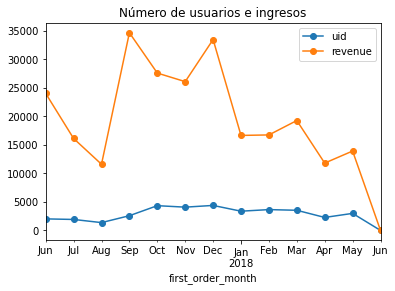

In [ ]:
cohort.plot(title='Número de usuarios e ingresos', style='o-')

En la tabla de arriba, podemos observar con respecto a los ingresos de cada cohorte, que hay determinados meses en los que se produce un pico de ingresos por ejemplo en la cohorte del 2017-06-01, 2017-09-01,	2017-12-01. Entre esos picos, los ingresos descienden hasta alcanzar el nuevo pico.

Con respecto a la cantidad de usuarios, podemos observar que las cohortes entre junio de 2017 hasta agosto inclusive de 2017, la cantidad de usuarios en las cohortes descendió; para los meses de octubre, noviembre y diciembre de 2017 hay un pico de usuarios; a partir de la cohorte del 2018-01-01 la cantidad de usuarios comienza a descender nuevamente llegando a diciembre con un descenso drástico de 1 usuario. Este puede deberse a que al momento de envíar la información todavia no había datos (apenas 1) para el mes de junio de 2018.

Con respecto a la relación entre la cantidad de usuarios y los ingresos podemos observar que por más que tengan muchos usuarios no necesariamente significa que el ingreso va a aumentar o que todos los usuarios decidan gastar mucho.

In [ ]:
# Muestro N de personas activas mes a mes.

orders.pivot_table(index='first_order_month', columns='order_month',values='uid', aggfunc='nunique').fillna('')


order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,
2017-07-01,,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,
2017-08-01,,,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,
2017-09-01,,,,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,
2017-10-01,,,,,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,
2017-11-01,,,,,,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,
2017-12-01,,,,,,,4383.0,146.0,103.0,97.0,50.0,63.0,
2018-01-01,,,,,,,,3373.0,114.0,83.0,43.0,45.0,
2018-02-01,,,,,,,,,3651.0,118.0,58.0,39.0,


En la tabla anterior, podemos observar que la cantidad de usuarios activos(que hacen órdenes) disminuye muchísimo con respetco al primer mes del cohorte. A lo largo del ciclo de cada cohorte hay algunos que tienen pequeñas fluctuaciones pero todas las cohortes tienen una reducción muy grande de usuarios activos hacia el final del ciclo. 

* Investigo como cambia el ingreso promedio por usuario con el timepo

In [ ]:
# agrupamos por primer mes de compra y mes de compras para ver los ingrespos generados y cantidad de usuarios.

order_cohort= orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
order_cohort
                    

revenue   uid
first_order_month order_month                
2017-06-01        2017-06-01    9557.49  2023
                  2017-07-01     981.82    61
                  2017-08-01     885.34    50
                  2017-09-01    1931.30    54
                  2017-10-01    2068.58    88
...                                 ...   ...
2018-03-01        2018-05-01    1114.87    58
2018-04-01        2018-04-01   10600.69  2276
                  2018-05-01    1209.92    69
2018-05-01        2018-05-01   13925.76  2988
2018-06-01        2018-06-01       3.42     1

[79 rows x 2 columns]

In [ ]:
# Agrego ingreso promedio por persona

order_cohort['revenue_per_user']= (order_cohort['revenue'] / order_cohort['uid'])
order_cohort#

revenue   uid  revenue_per_user
first_order_month order_month                                  
2017-06-01        2017-06-01    9557.49  2023          4.724414
                  2017-07-01     981.82    61         16.095410
                  2017-08-01     885.34    50         17.706800
                  2017-09-01    1931.30    54         35.764815
                  2017-10-01    2068.58    88         23.506591
...                                 ...   ...               ...
2018-03-01        2018-05-01    1114.87    58         19.221897
2018-04-01        2018-04-01   10600.69  2276          4.657597
                  2018-05-01    1209.92    69         17.535072
2018-05-01        2018-05-01   13925.76  2988          4.660562
2018-06-01        2018-06-01       3.42     1          3.420000

[79 rows x 3 columns]

In [ ]:
# Muestro cambios en los ingresos

order_cohort.pivot_table(index='first_order_month', columns='order_month',values='revenue_per_user', aggfunc='mean').fillna('')


order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151,
2017-07-01,,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08-01,,,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,
2017-09-01,,,,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,
2017-10-01,,,,,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,
2017-11-01,,,,,,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,
2017-12-01,,,,,,,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,
2018-01-01,,,,,,,,4.135636,8.721228,12.365542,11.199767,4.699556,
2018-02-01,,,,,,,,,4.156987,8.61,4.942414,6.941026,


Podemos observar que los ingresos promedio por persona en cada cohorte aumentan con respecto al mes 0 del cohorte. El cohorte del 2017-09-01 en el tercer mes tiene un ingreso por persona muy alto con respecto a los otros meses del mismo cohorte.

In [ ]:
# Busco ciclo de vida de los cohortes

order_cohort= order_cohort.reset_index()
order_cohort['cohort_lifetime']= order_cohort['order_month'] - order_cohort['first_order_month']
order_cohort['cohort_lifetime']=order_cohort['cohort_lifetime'] / np.timedelta64(1,'M')
order_cohort['cohort_lifetime']= order_cohort['cohort_lifetime'].round().astype(int)
order_cohort


,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897,2
75,2018-04-01,2018-04-01,10600.69,2276,4.657597,0
76,2018-04-01,2018-05-01,1209.92,69,17.535072,1
77,2018-05-01,2018-05-01,13925.76,2988,4.660562,0


<AxesSubplot:title={'center':'Ingresos promedio por persona por ciclo de vida de cohorte'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

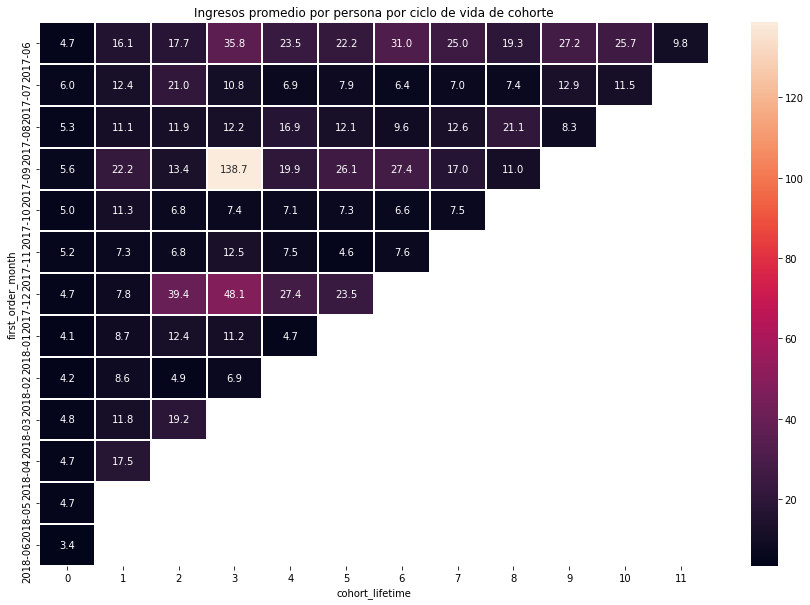

In [ ]:
# Dejo solo mes y año en la columna de cohortes y hago tabla dinámica para mostrar los cambios en los ingresos promedio por persona

order_cohort['first_order_month']= order_cohort['first_order_month'].dt.strftime('%Y-%m')

revenue_per_user= order_cohort.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_user')
revenue_per_user

plt.figure(figsize=(15,10))
plt.title('Ingresos promedio por persona por ciclo de vida de cohorte')
sns.heatmap(revenue_per_user, annot=True, fmt='.1F',linewidths=1)


Como podemos observar en el heatmap de arriba, confirmamos lo visto con anterioradad. Todos los cohortes terminan un un mayor ingreso que cuando comenzaron. El 2017-09 podemos observar que en el tercer mes tiene ingreso promedio por persona muy alto y despues vuelve a bajar paulativamente. El cohorte del 12-2017 a la mitad de su ciclo de vida, también tiene ingresos más altos y luego se reducen a la mitad.

A continuación voy a investigar los costos que tuvo cada cohorte por mes y los costos por fuente.

In [ ]:
# Calculo los costos totales por mes

costs['month']= costs['dt'].astype('datetime64[M]')
costos_mensual= costs.groupby('month').agg({'costs':'sum'}).reset_index()
costos_mensual


,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Podemos observar que los costos de marketing van aumentando mes a mes hasta el 2018-02-01 que comienzan a bajar. Así y todo los costos al final siguen siendo mayores que al inicio. 

In [ ]:
# Calculo CAC por mes

can_usuarios= orders.groupby('order_month').agg({'uid':'nunique'}).reset_index()
can_usuarios.columns=['month','uid']

cac= costos_mensual.merge(can_usuarios, on='month')
cac['cac']= cac['costs'] / cac['uid']
cac


,month,costs,uid,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1984,9.193846
2,2017-08-01,14790.54,1472,10.047921
3,2017-09-01,24368.91,2750,8.861422
4,2017-10-01,36322.88,4675,7.769600
5,2017-11-01,37907.88,4547,8.336899
6,2017-12-01,38315.35,4942,7.753005
7,2018-01-01,33518.52,3898,8.598902
8,2018-02-01,32723.03,4258,7.685070
9,2018-03-01,30415.27,4181,7.274640


Como podemos observar en la tabla de arriba, a medida que aumentan los costos también aumentan los usuarios, se ve que la campaña de marketing resultó. El mes que tuvo un mayor costo de adquisición fue el mes de 2017-08-01. El resto de los meses se mantuvo bastante parejo.

In [ ]:
# costos mensuales por fuente

costos_por_fuente= costs.groupby(['month','source_id']).agg({'costs':'sum'}).reset_index()
costos_por_fuente


,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [ ]:
# Armo una pivot table para ver los costos por mes por cada fuente

costos_por_fuente.pivot_table(index='month', columns='source_id', values='costs')



source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [ ]:
# Busco las visitas por mes para cada funte 

visits['mes']= visits['start ts'].astype('datetime64[M]')

visitas_por_fuente= visits.groupby(['mes','source id']).agg({'uid':'nunique'}).reset_index()
visitas_por_fuente.columns= ['month','source_id','uid']

visitas_por_fuente= visitas_por_fuente.query('source_id not in(6,7)')
visitas_por_fuente


,month,source_id,uid
0,2017-06-01,1,972
1,2017-06-01,2,1532
2,2017-06-01,3,4226
3,2017-06-01,4,3636
4,2017-06-01,5,2903
...,...,...,...
96,2018-05-01,3,5343
97,2018-05-01,4,7275
98,2018-05-01,5,4038
100,2018-05-01,9,753


La fuente 6 y 7 las excluí porque casi no tienen datos, tiene uno o dos usarios y no tenemos los costos para esas funtes.

In [ ]:
# Uno las tablas de costos por fuente y visitas por fuente para calcular el CAC

cac_fuente= pd.merge(costos_por_fuente,visitas_por_fuente)
cac_fuente

cac_fuente['cac']= cac_fuente['costs'] / cac_fuente['uid']
cac_fuente

#Armo una pivot table para representar mejor los resultados

cac_fuente.pivot_table(index='month', columns='source_id', values='cac')


source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1.158035,1.584452,1.829543,0.966667,0.901178,0.378778,0.735878
2017-07-01,1.024718,1.314428,1.886522,0.857980,0.804438,0.538327,1.043734
2017-08-01,1.198753,1.420431,1.798460,1.028239,0.694622,0.406085,0.953156
2017-09-01,1.076710,1.401718,1.710481,0.965643,0.780442,0.532164,0.917669
2017-10-01,1.067166,1.446269,1.844280,0.674883,0.766432,0.584286,0.677365
2017-11-01,0.876401,1.251534,1.670789,0.479945,0.972381,0.459126,0.892297
2017-12-01,0.856015,1.323015,1.764142,0.651605,0.943832,0.533209,1.040032
2018-01-01,1.020626,1.312418,1.736286,0.569219,0.936131,0.516676,0.664162
2018-02-01,1.039359,1.416379,1.638103,0.585482,0.852035,0.532336,0.441985


In [ ]:
# Calculo romi por cohorte

t1= orders.groupby('order_month').agg({'revenue':'sum'}).reset_index()
t1.columns= ['month','revenue']
t1

romi= pd.merge(costos_mensual,t1)
romi['romi']= romi['revenue'] / romi['costs']
romi


,month,costs,revenue,romi
0,2017-06-01,18015.00,9557.49,0.530530
1,2017-07-01,18240.59,12539.47,0.687449
2,2017-08-01,14790.54,8758.78,0.592188
3,2017-09-01,24368.91,18345.51,0.752824
4,2017-10-01,36322.88,27987.70,0.770525
5,2017-11-01,37907.88,27069.93,0.714098
6,2017-12-01,38315.35,36388.60,0.949713
7,2018-01-01,33518.52,19417.13,0.579296
8,2018-02-01,32723.03,25560.54,0.781118
9,2018-03-01,30415.27,28834.59,0.948030


En la tabla de arriba podemos observar que ningún cohorte alcanza a cumbrir la inversión. Hay tres cohortes que estan muy cerca de llegar al punto de equilibrio que son la cohorte del 2017-12-01, 2018-03-01 y 2018-05-01.

## Conclusión

Para concluir, podemos observar que el dispositivo más utilizado es el desktop por amplia mayoría.

Con respecto a las fuentes, podemos decir que ninguna alcanza a recuperar las inversiones realizadas. Si bien al momento de hacer campañas la gente responde porque generan más compras, rapidamente estas caen. Cuando llegan al punto máximo de clientes, los ingresos generados por estos no alcanzan a cubrir los gastos. Hay varios usuarios que realiza más de una compra .

De acuerdo a los resultados obtenidos, si bien las cohortes no alcanzan a cubrir los gastos hay tres en particular que se encuentran cerca de alcanzar el punto de equilibrio. Estas son la corte del 2017-12-01, 2018-03-01 y 2018-05-01.
